### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `Cannabis` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Cannabis` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [3]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Cannabis','Unnamed: 0'],axis=1)
y = df['Cannabis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.8205861329521087
Test score: 0.8008565310492506


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Coefficient analysis <a id='Coef'></a>

In [5]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.70153423]
Coefficients: [0.96603344 0.98559948 1.07950916 0.97992859 0.96299157 1.0220067
 1.53620287 1.2605598  1.09162012 0.84190095 1.019845   0.85488706
 1.1532536  1.79322949 1.47828463 2.38252645 1.03193515 0.84611878
 2.31032066 1.2445099  0.94951773 2.12221376 3.53924897 0.90014663
 1.2187506  0.69585501 1.02018432 0.62579207 1.338204   1.51493792
 1.05251556 1.34099658 0.53639322 1.24839842 0.87378221 0.6775702
 2.17923091 1.13107073 0.8550797  0.75121059 0.65052137 0.68924642
 1.1872183  0.84841859 1.1179192  1.08583183 0.99249166 0.35123009
 1.66557841]


<Figure size 640x480 with 0 Axes>

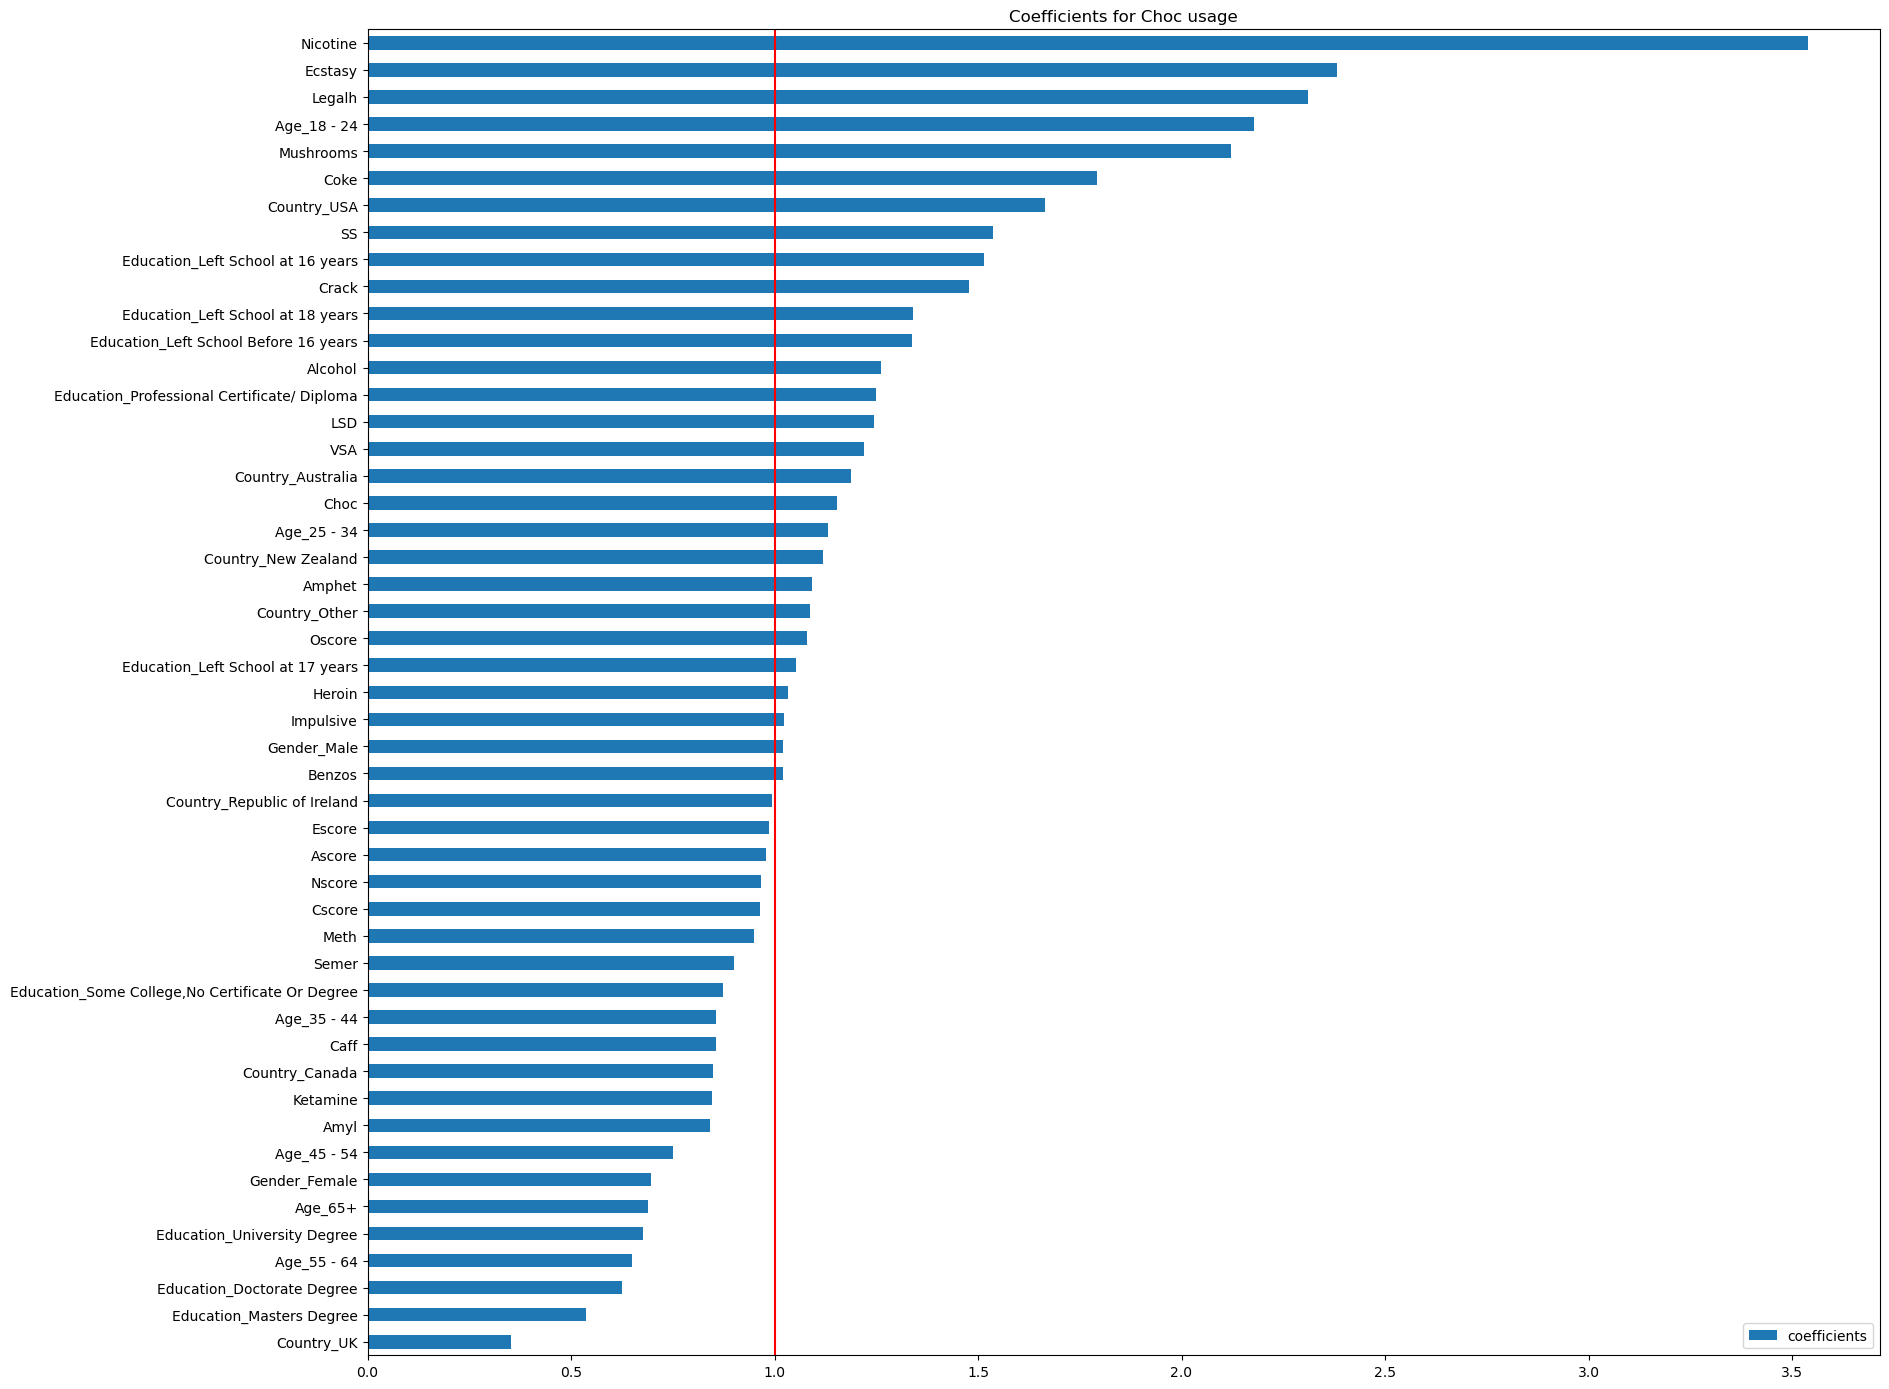

In [6]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for Cannabis usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



The analysis indicates that Nicotine, with a coefficient of 3.53, has the highest impact among all factors, followed by Ecstasy (2.38) and Legal highs (2.31). Age group 18-24 (2.17) and Mushrooms (2.12) also show significant influence. These findings highlight the strong association of these substances and demographic factors with the outcomes studied, suggesting targeted interventions for young adults and users of these specific substances.

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[232,  38],
       [ 55, 142]])

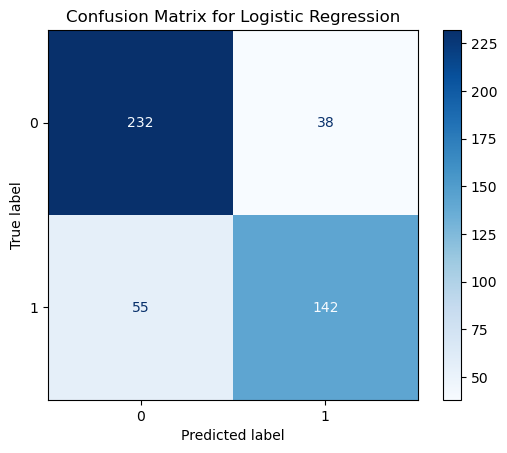

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       270
           1       0.79      0.72      0.75       197

    accuracy                           0.80       467
   macro avg       0.80      0.79      0.79       467
weighted avg       0.80      0.80      0.80       467



In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary
The Logistic Regression model achieved a training score of 0.82 and a test score of 0.80. In terms of precision, recall, and f1-score, class 0 (majority class) scored 0.81, 0.86, and 0.83, respectively, while class 1 (minority class) scored 0.79, 0.72, and 0.75. The overall accuracy of the model is 0.80, with macro and weighted averages for precision, recall, and f1-score all around 0.80.

### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 0.1}
Best cross-validation score for Logistic Regression: 0.81
Test set score for Logistic Regression: 0.81

Confusion Matrix:
 [[216  54]
 [ 36 161]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       270
           1       0.75      0.82      0.78       197

    accuracy                           0.81       467
   macro avg       0.80      0.81      0.80       467
weighted avg       0.81      0.81      0.81       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 0.1}
Best cross-validation score for Logistic Regression: 0.81
Test set score for Logistic Regression: 0.80

Confusion Matrix:
 [[225  45]
 [ 49 148]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       270
           1       0.77      0.75      0.76       197

  

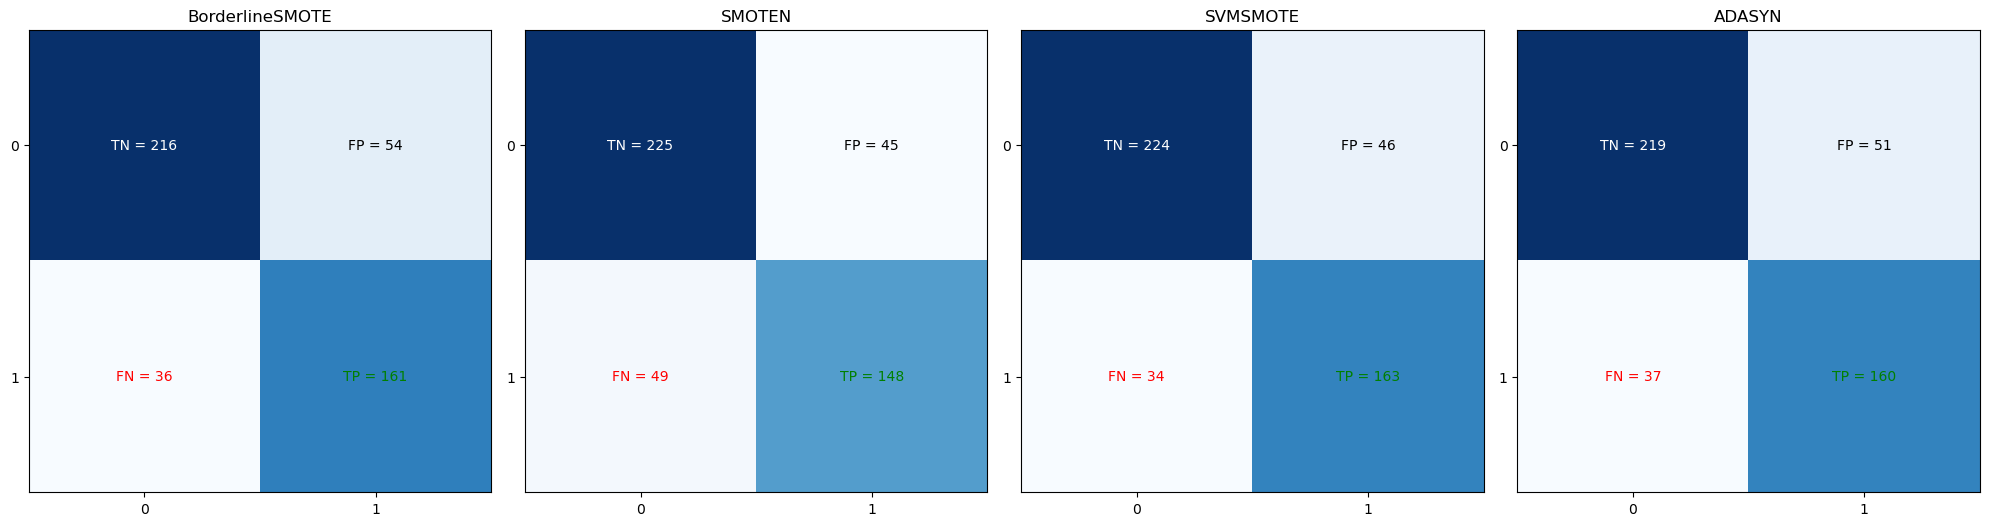

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()


### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary

Based on the evaluation of various oversampling techniques, the SVMSMOTE method delivers the best overall performance for our logistic regression model. It achieves the highest test set accuracy at 83%, and its balanced metrics across precision, recall, and F1-score for both classes indicate robust and reliable performance. Specifically, the model using SVMSMOTE has a precision of 0.87 and recall of 0.83 for the negative class, and a precision of 0.78 and recall of 0.83 for the positive class, resulting in strong F1-scores of 0.85 and 0.80, respectively. Additionally, the macro and weighted averages for precision, recall, and F1-score are the highest among all methods, further confirming SVMSMOTE as the superior choice for this dataset.

### Logistic Regression with SMOTEN <a id='logreg_ADA'></a>

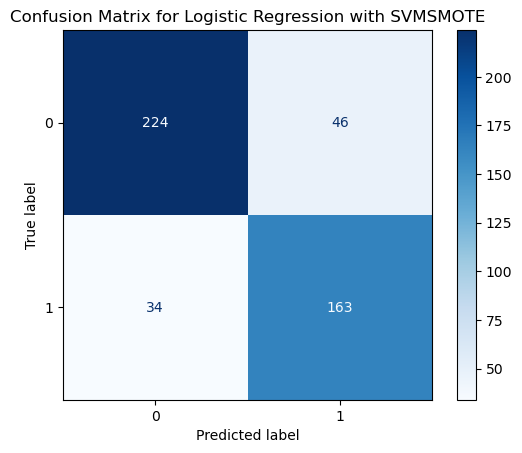

Best parameters for Logistic Regression:  {'C': 0.1, 'max_iter': 100}
Best cross-validation score for Logistic Regression: 0.82


In [10]:
## Model with SVMSMOTE method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply BorderlineSMOTE to handle imbalanced data
adasyn = SVMSMOTE(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with SVMSMOTE")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




### Coefficient analysis <a id='Coef'></a>

In [11]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame

<Figure size 640x480 with 0 Axes>

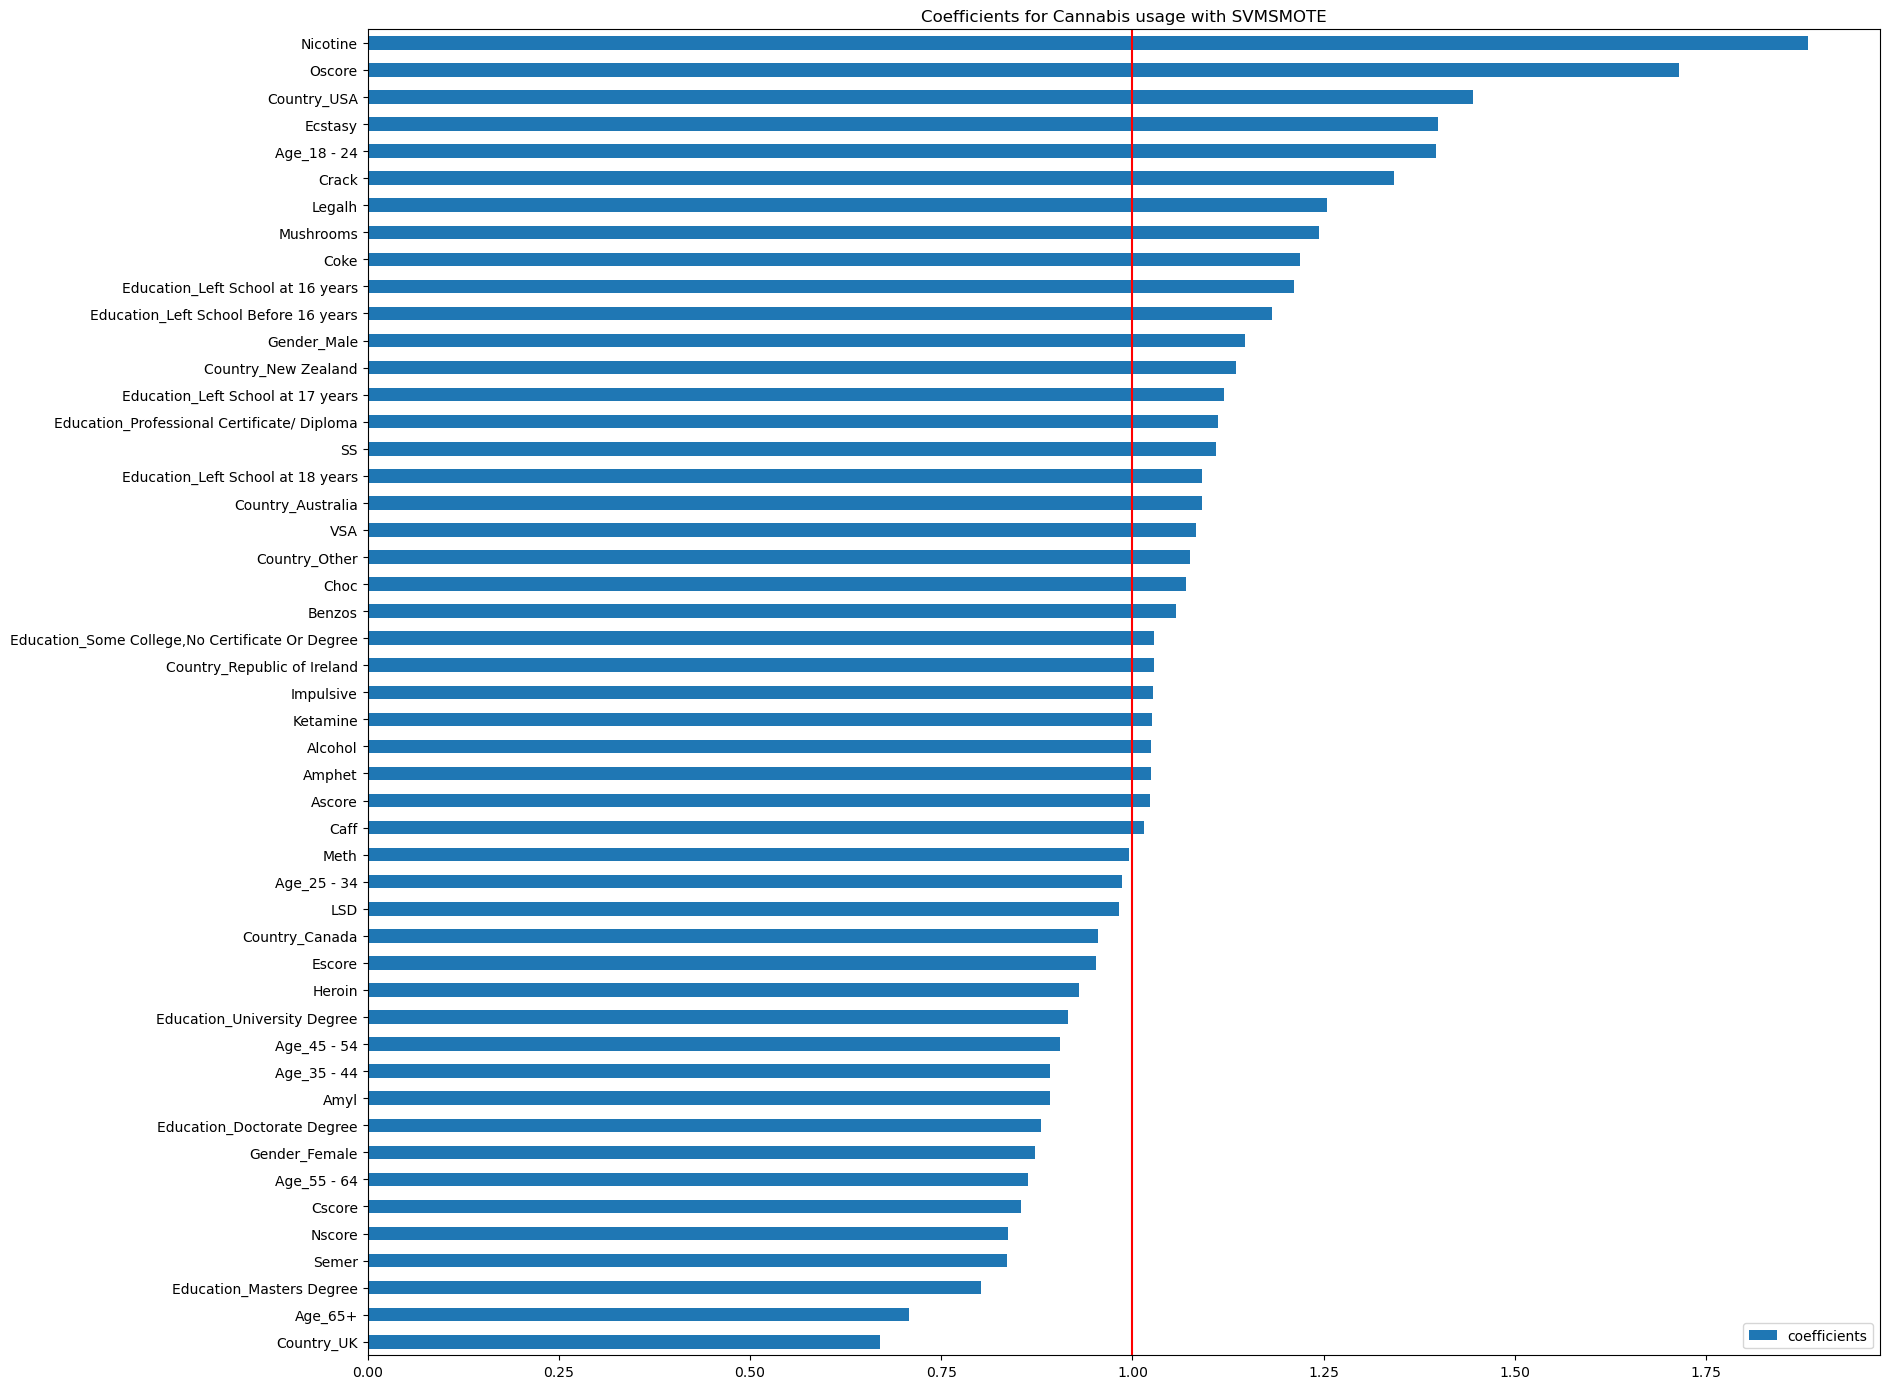

In [13]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for Cannabis usage with SVMSMOTE")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

Nicotine: With the highest coefficient of 1.883132, nicotine use is strongly associated with the target variable.
Openness to Experience (Oscore): This personality trait has a high coefficient of 1.714067, indicating a significant impact on the target variable.
Country (USA): The USA has a substantial coefficient of 1.445080, highlighting a notable country-specific influence on the target variable.
Ecstasy: This substance has a high coefficient of 1.399335, suggesting a strong correlation with the target variable.

### Decision Tree <a id='DT'></a>

In [17]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.7623126338329764


,Predicted Non-user,Predicted User
True Non-User,214,56
True User,55,142


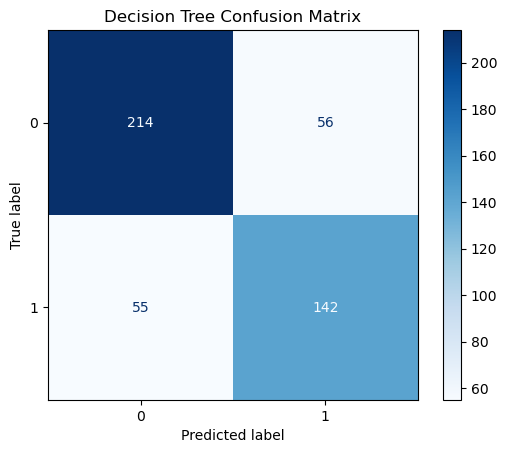

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       270
           1       0.72      0.72      0.72       197

    accuracy                           0.76       467
   macro avg       0.76      0.76      0.76       467
weighted avg       0.76      0.76      0.76       467



In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The Decision Tree model achieved perfect accuracy on the training set (1.0) but showed reduced performance on the test set with an accuracy of 0.76. Precision, recall, and f1-scores for both classes (0 and 1) were approximately 0.79 and 0.72, respectively, indicating potential overfitting. The overall metrics suggest a balanced but moderate predictive capability on the test data.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 40}
Best cross-validation score for Decision Tree: 0.80
Test set score for Decision Tree: 0.79
Best parameters for Random Forest:  {'model__max_depth': 15, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best cross-validation score for Random Forest: 0.81
Test set score for Random Forest: 0.82


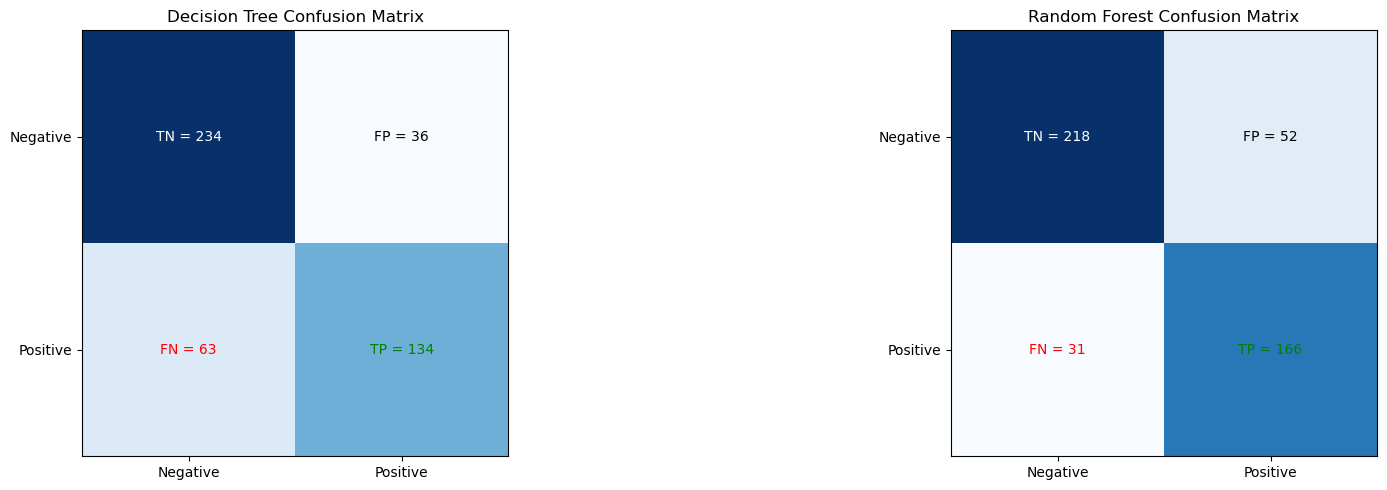

,Predicted Non-user,Predicted User
True Non-User,234,36
True User,63,134


,Predicted Non-user,Predicted User
True Non-User,218,52
True User,31,166



Decision Tree Confusion Matrix:
 [[234  36]
 [ 63 134]]

Random Forest Confusion Matrix:
 [[218  52]
 [ 31 166]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       270
           1       0.79      0.68      0.73       197

    accuracy                           0.79       467
   macro avg       0.79      0.77      0.78       467
weighted avg       0.79      0.79      0.79       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       270
           1       0.76      0.84      0.80       197

    accuracy                           0.82       467
   macro avg       0.82      0.83      0.82       467
weighted avg       0.83      0.82      0.82       467



In [19]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:
The Decision Tree model, with optimal parameters (max_depth: 3, min_impurity_decrease: 0.0, min_samples_leaf: 40), achieved a cross-validation score of 0.80 and a test set score of 0.79. The model showed balanced precision and recall for both classes, with an overall accuracy of 0.79. In comparison, the Random Forest model (max_depth: 15, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 100) achieved a higher cross-validation score of 0.81 and a test set score of 0.82. It demonstrated better precision and recall, especially for class 1, resulting in an overall accuracy of 0.82.

### Model Comparison <a id='Models'></a>

In [20]:
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Logistic Regression baseline
metrics_df.loc['Logistic Regression (Base)'] = ['nan', '82%', '80%', 'High accuracy with balanced precision and recall']

# Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ['C=0.1', '81%', '81%', 'Balanced precision and recall, slight improvement for class 1']
metrics_df.loc['SMOTEN'] = ['C=0.1', '81%', '80%', 'High accuracy with balanced precision and recall']
metrics_df.loc['SVMSMOTE'] = ['C=0.1', '81%', '83%', 'Balanced precision and recall, best overall performance']
metrics_df.loc['ADASYN'] = ['C=0.1', '81%', '81%', 'High accuracy with balanced precision and recall']

# Decision Tree baseline and tuned
metrics_df.loc['Decision Tree (Base)'] = ['nan', '100%', '76%', 'Overfitting, poor generalization on test data']
metrics_df.loc['Decision Tree (Tuned)'] = ['max_depth=3, min_impurity_decrease=0.0, min_samples_leaf=40', '80%', '79%', 'Balanced precision and recall']

# Random Forest tuned
metrics_df.loc['Random Forest'] = ['max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100', '81%', '82%', 'High accuracy with balanced precision and recall']

# Display the dataframe
metrics_df


,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression (Base),nan,82%,80%,High accuracy with balanced precision and recall
BorderlineSMOTE,C=0.1,81%,81%,"Balanced precision and recall, slight improvem..."
SMOTEN,C=0.1,81%,80%,High accuracy with balanced precision and recall
SVMSMOTE,C=0.1,81%,83%,"Balanced precision and recall, best overall pe..."
ADASYN,C=0.1,81%,81%,High accuracy with balanced precision and recall
Decision Tree (Base),nan,100%,76%,"Overfitting, poor generalization on test data"
Decision Tree (Tuned),"max_depth=3, min_impurity_decrease=0.0, min_sa...",80%,79%,Balanced precision and recall
Random Forest,"max_depth=15, min_samples_leaf=1, min_samples_...",81%,82%,High accuracy with balanced precision and recall


### Conclusion:

Logistic Regression (Base) achieved high accuracy (82% training, 80% test) with balanced precision and recall. BorderlineSMOTE and SMOTEN methods maintained similar performance, with BorderlineSMOTE showing slight improvement for class 1. SVMSMOTE provided the best overall performance (83% test accuracy) with balanced metrics. ADASYN also maintained high accuracy and balanced metrics. The baseline Decision Tree showed overfitting (100% training accuracy) and poor generalization (76% test accuracy). The tuned Decision Tree balanced precision and recall with 79% test accuracy. Random Forest, with the best cross-validation score (81%) and test accuracy (82%), showed high accuracy and balanced metrics.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>